###### 시계열 데이터 시각화 하기 

###### 항공사 직원이라는 가정 - 시계열 데이터를 통한 수요 분석

###### 가설 세우고 검정하기 : 여름 휴가철에는 항공 이용이 많을 것

In [2]:
# 라이브러리 로드
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
# https://seaborn.pydata.org/examples/heatmap_annotation.html - seaborn의 예제 사용 

In [5]:
# 데이터셋 로드 
df = sns.load_dataset("flights")
df.shape # (144, 3)

(144, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [8]:
df.head() # 년, 월, 탑승객 

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### 같은 데이터로 다양한 시각화 
#### bar, line , point, violin, swarm plot4 

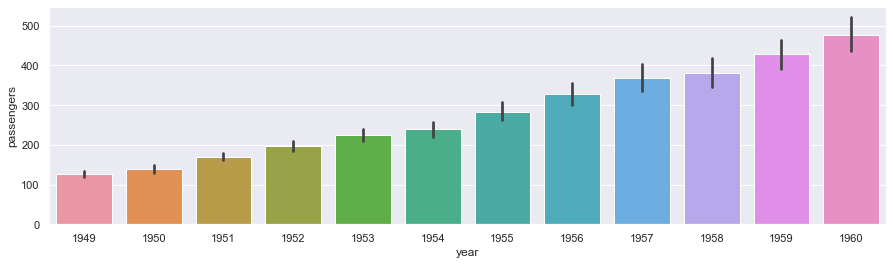

In [17]:
# barplot - 연도별 탑승객의 수 
# 연속되는 숫자, 연도등을 평균 값을 넣을 때 사용 
# 그래프를 보다 넓게 보고 싶을 때.
plt.figure(figsize=(15,4))

sns.barplot(data = df, x = 'year', y = 'passengers')
# 검은색 바를 사용 신뢰구간 출력.  
# y축은 평균 값을 의미

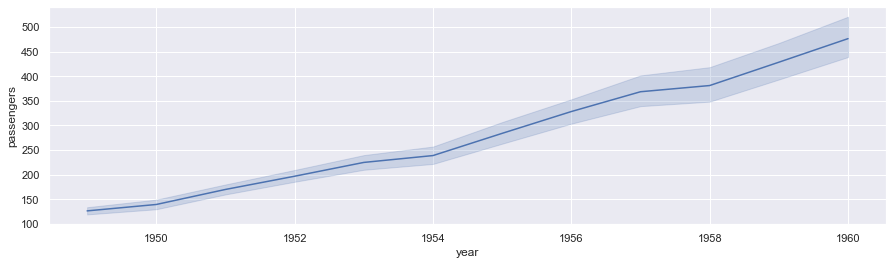

In [19]:
# lineplot 
# 그래프를 보다 넓게 보고 싶을 때.- 평균 
plt.figure(figsize=(15,4))

sns.lineplot(data = df, x = 'year', y = 'passengers')
# 그림자를 통해서 신뢰구간 출력, 
# y축은 평균 값을 의미

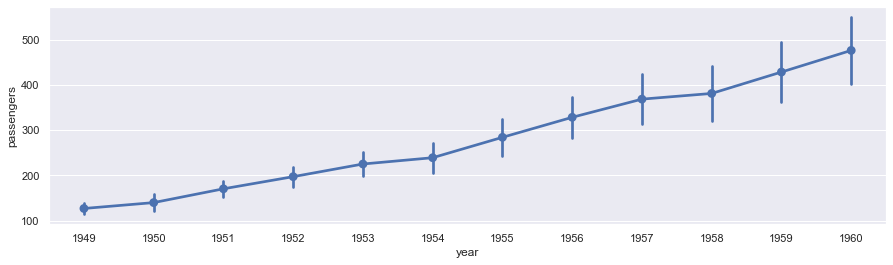

In [21]:
# pointplot
# 그래프를 보다 넓게 보고 싶을 때.
plt.figure(figsize=(15,4))

sns.pointplot(data = df, x = 'year', y = 'passengers', ci= 'sd') 
# ci - 표준편차 출력
# 위의 선을 통해서 신뢰구간 출력, 

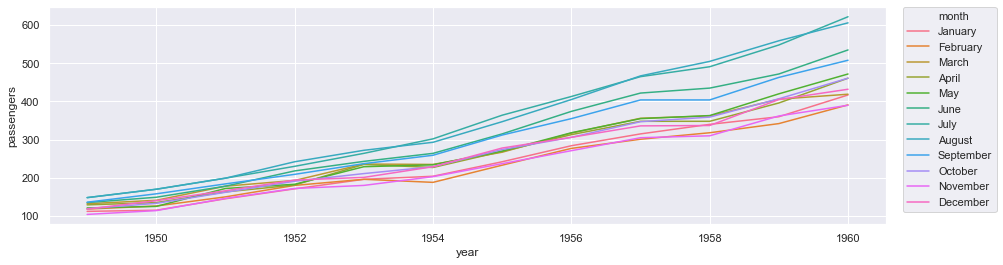

In [29]:
# lineplot 에 hue를 통해 month 값에 따라 여러 색으로 나눠 그리기
# hue 옵션을 입력하여 색상을 다르게 표시 
# 그래프를 보다 넓게 보고 싶을 때.
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = 'year', y = 'passengers', hue = 'month')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

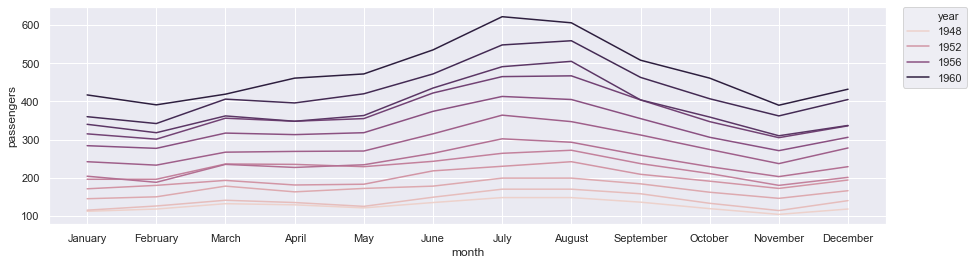

In [30]:
# lineplot 에 hue를 통해 year 값에 따라 여러 색으로 나눠 그리기
# hue 옵션을 입력하여 색상을 다르게 표시 
# 그래프를 보다 넓게 보고 싶을 때.
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = 'month', y = 'passengers', hue = 'year')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

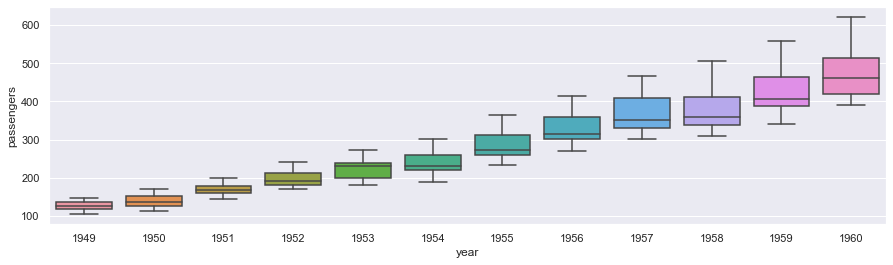

In [32]:
# boxplot
plt.figure(figsize=(15,4))
sns.boxplot(data= df, x = 'year', y = 'passengers') 

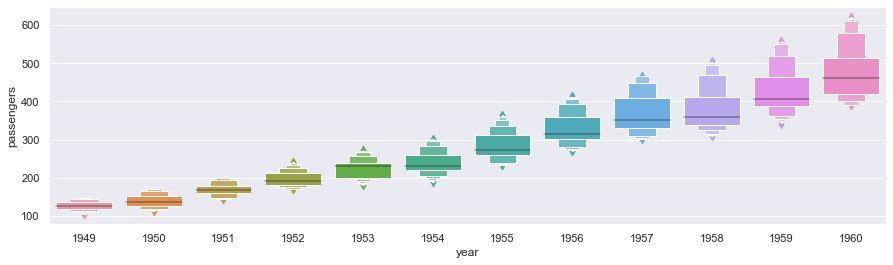

In [33]:
# boxenplot - 어느 구간에 더 밀집 되어 있는지 확인 
plt.figure(figsize=(15,4))
sns.boxenplot(data= df, x = 'year', y = 'passengers') 

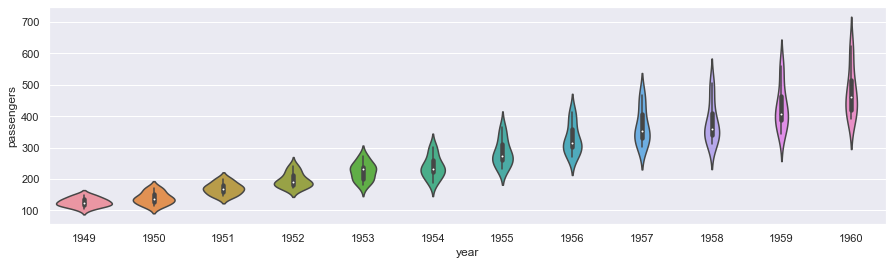

In [34]:
# violinplot - 바이올린 모양으로 자세히 표현이 가능(안에 하얀점 = 중앙값)
plt.figure(figsize=(15,4))
sns.violinplot(data= df, x = 'year', y = 'passengers') 

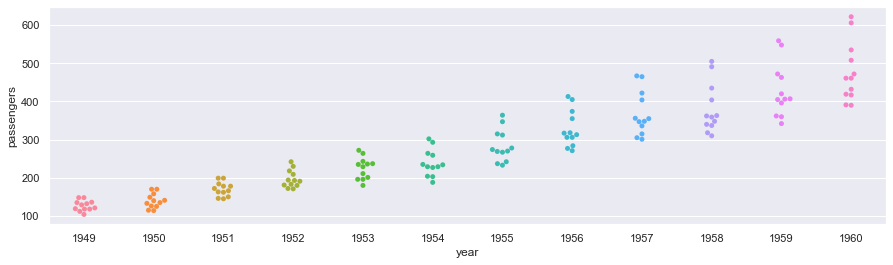

In [35]:
# swarmplot - 산점도 표현 - 한해의 12개씩 데이터가 있기 때문에 12개의 점이 출력
plt.figure(figsize=(15,4))
sns.swarmplot(data= df, x = 'year', y = 'passengers') 

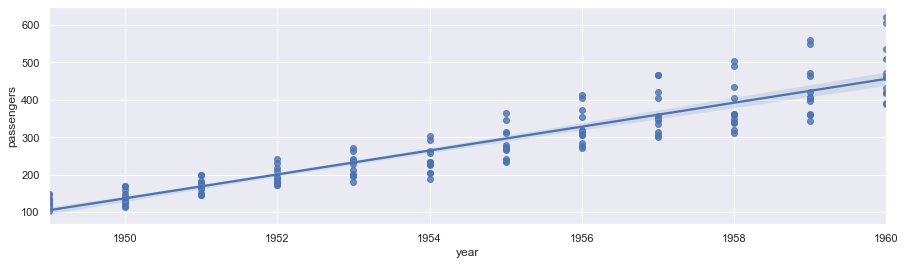

In [36]:
# regplot  - 회기선을 그리는 plot (전반적으로 진행이 어떻게 진행되는지 확인 가능)
plt.figure(figsize=(15,4))
sns.regplot(data= df, x = 'year', y = 'passengers') 

#### pivot으로 데이터 형태 바꾸기

In [41]:
# pivot으로 데이터 형태 바꾸기 - 이거 좋은데 ㅋㅋㅋㅋ
df_h = df.pivot(index = 'year', columns ='month' , values = 'passengers') 
df_h

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


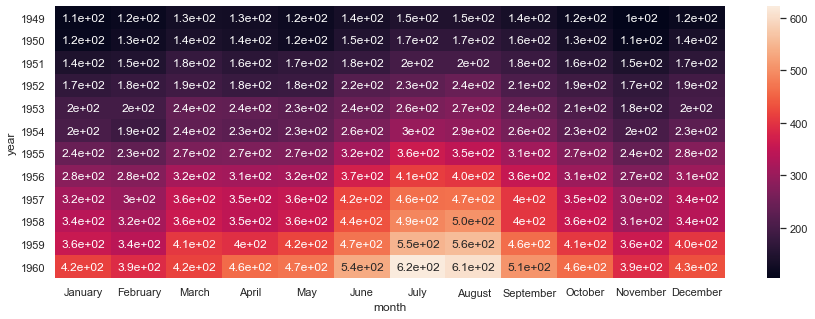

In [47]:
# heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_h , annot = True) # annot = True : 그리프 안에 숫자를 넣어준다. 

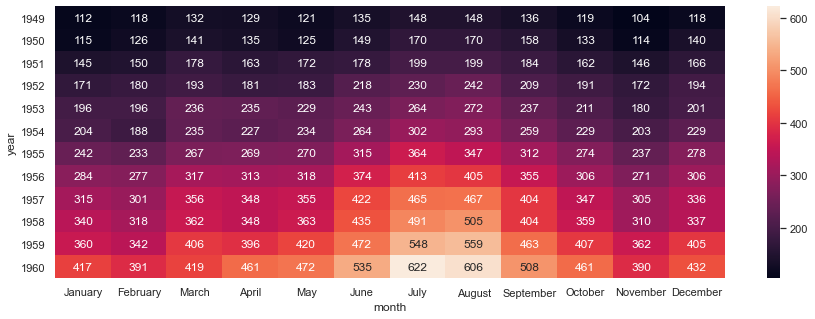

In [48]:
# heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_h , annot = True, fmt = '.0f') 
# annot = True : 그리프 안에 숫자를 넣어준다
# fmt = '.0f' : 숫자를 변형 

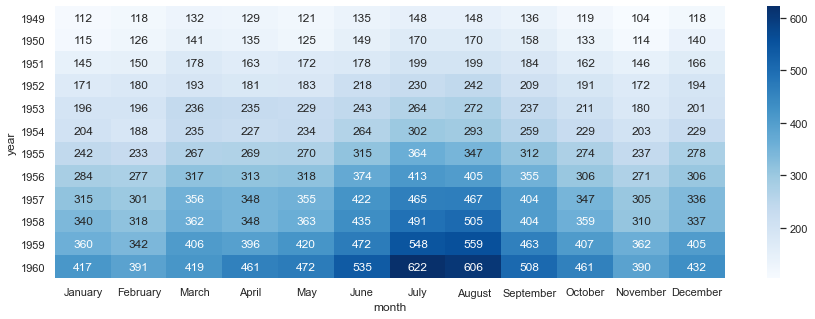

In [49]:
# heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_h , annot = True, fmt = '.0f', cmap = 'Blues') 
# annot = True : 그리프 안에 숫자를 넣어준다
# fmt = '.0f' : 숫자를 변형 
# cmap = 'Blues' : 숫자가 클수록 진하게 

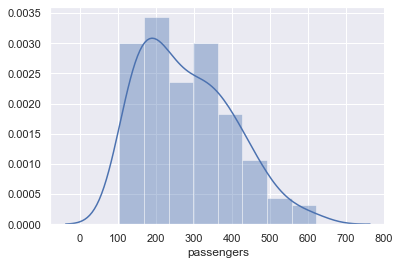

In [51]:
# 추가 상식 - 함수를 사용할 때 사용법을 알고 싶으면 shift + tap을 누르면 어떤 매개변수가 들어가는지 보여준다. 

# distplot 
sns.distplot(df['passengers'])

#### 서브플롯 그리기 

<Figure size 1080x360 with 0 Axes>

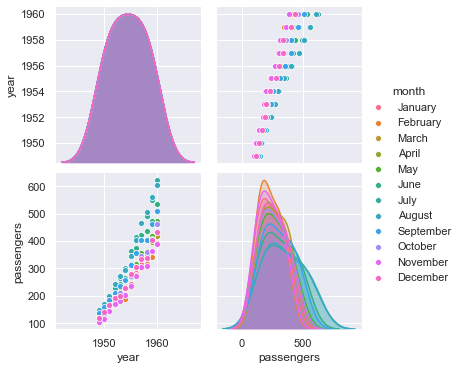

In [60]:
#  pairplot 
plt.figure(figsize= (15,5))
sns.pairplot(data= df, hue = "month") # hue : 다르게 색을 넣고 싶을 때 

<Figure size 1080x360 with 0 Axes>

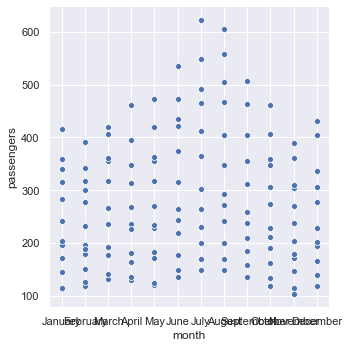

In [63]:
# relplot - 산점도 출력. 
plt.figure(figsize= (15,5))
sns.relplot(data = df, x = 'month' ,y = 'passengers')

<Figure size 1080x360 with 0 Axes>

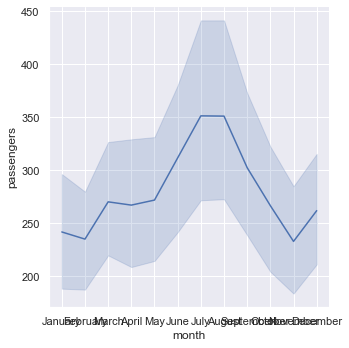

In [67]:
# relplot - 산점도 출력. 
plt.figure(figsize= (15,5))
sns.relplot(data = df, x = 'month' ,y = 'passengers', kind = 'line')
# kind를 통해서 그래프 종류를 변경 할 수 있다. 

<Figure size 1080x360 with 0 Axes>

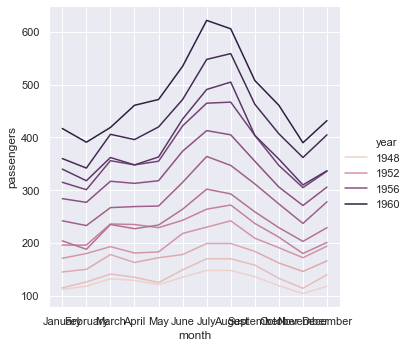

In [68]:
# relplot - 산점도 출력. 
plt.figure(figsize= (15,5))
sns.relplot(data = df, x = 'month' ,y = 'passengers', kind = 'line', hue = 'year')
# kind를 통해서 그래프 종류를 변경 할 수 있다. 
# hue를 통해서 각 색상을 넣는다. 

<Figure size 1080x360 with 0 Axes>

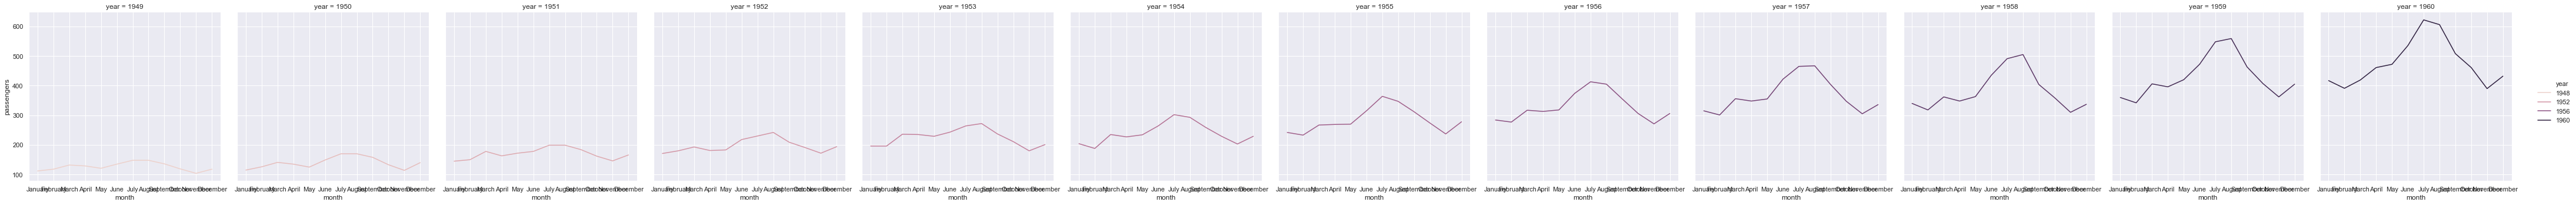

In [69]:
# relplot - 산점도 출력. 
plt.figure(figsize= (15,5))
sns.relplot(data = df, x = 'month' ,y = 'passengers', kind = 'line', hue = 'year', col ='year')
# kind를 통해서 그래프 종류를 변경 할 수 있다. 
# hue를 통해서 각 색상을 넣는다. 
# col를 통해서 각 년도별 그래프를 만들어준다. 

<Figure size 1080x360 with 0 Axes>

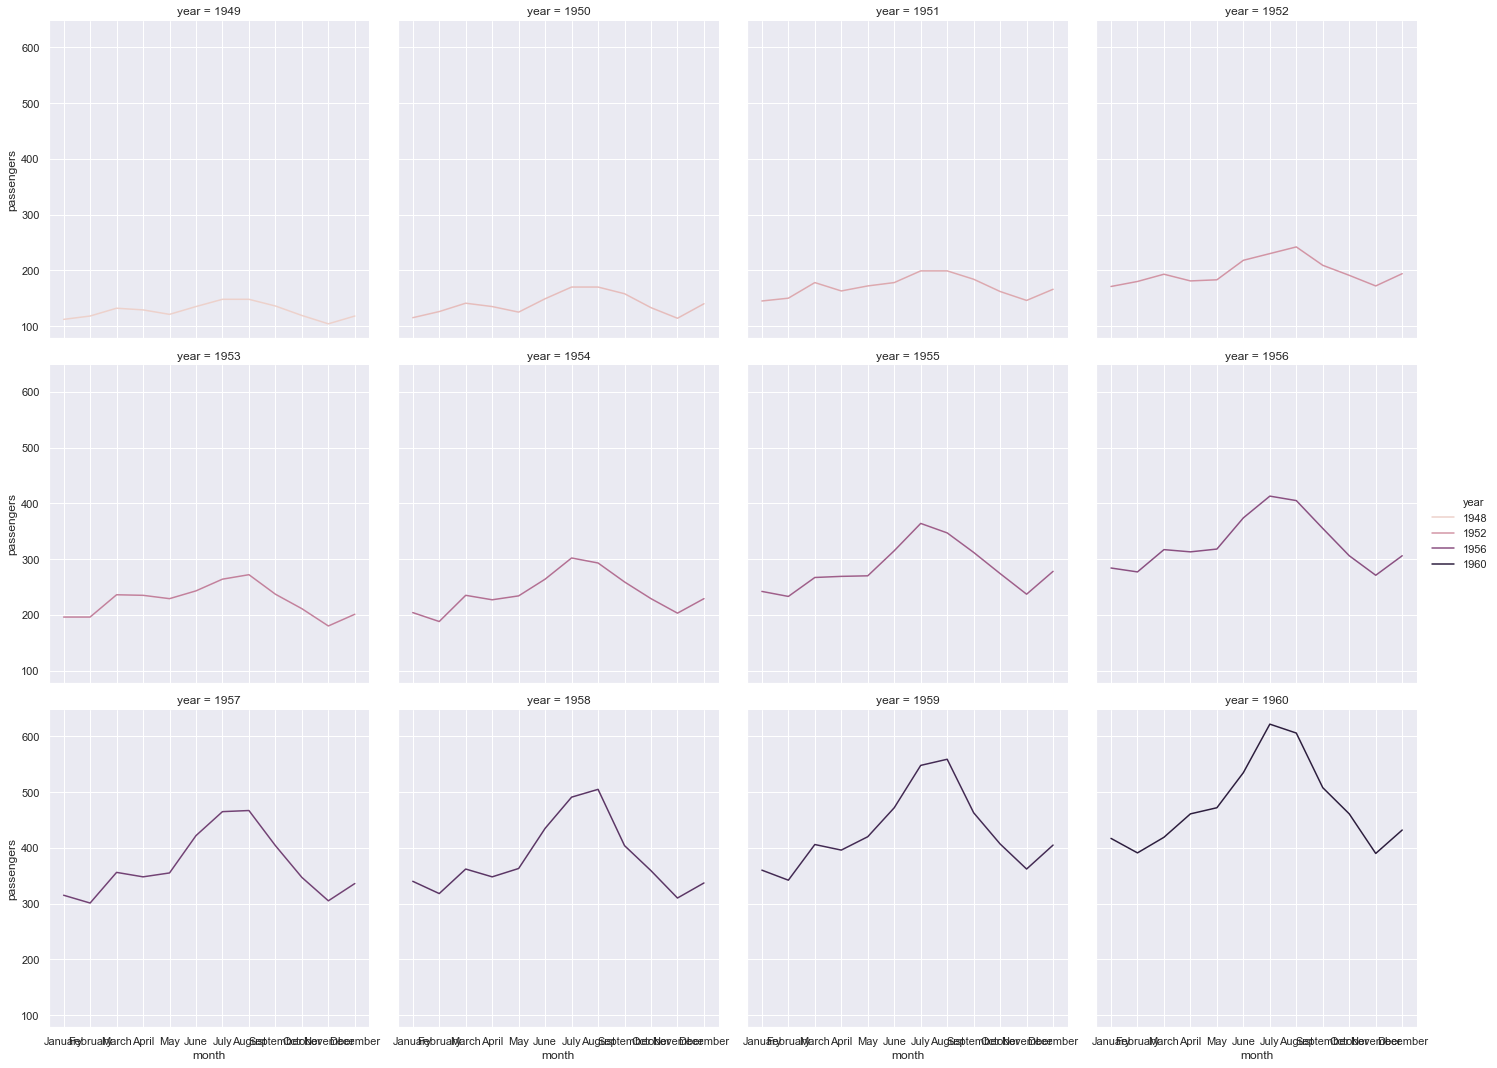

In [70]:
# relplot - 산점도 출력. 
plt.figure(figsize= (15,5))
sns.relplot(data = df, x = 'month' ,y = 'passengers', kind = 'line', hue = 'year', col ='year',col_wrap=4)
# kind를 통해서 그래프 종류를 변경 할 수 있다. 
# hue를 통해서 각 색상을 넣는다. 
# col를 통해서 각 년도별 그래프를 만들어준다. 
# col_wrap=4 을 넣어서 각 줄에 4개씩 만들어주도록 한다. 

#### datetime 형태로 변환해서 보기 

##### https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior